In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import cv2

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


11490434/11490434 [==============================] - 4s 0us/step


In [3]:
#Create a neural network model for digit recognition. You can customize the architecture based on your requirements.
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [4]:
model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=64)


Epoch 1/5
938/938 [==============================] - 44s 45ms/step - loss: 0.1678 - accuracy: 0.9508
Epoch 2/5
938/938 [==============================] - 43s 46ms/step - loss: 0.0564 - accuracy: 0.9826
Epoch 3/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0389 - accuracy: 0.9883
Epoch 4/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0268 - accuracy: 0.9919
Epoch 5/5
938/938 [==============================] - 43s 45ms/step - loss: 0.0188 - accuracy: 0.9942


In [5]:
#Evaluate the model's performance on the test data.
loss, accuracy = model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}')


313/313 [==============================] - 3s 9ms/step - loss: 0.0418 - accuracy: 0.9870
Test loss: 0.0418, Test accuracy: 0.9870


In [29]:
# Load your own handwritten digit image
image_path = "digit.jpg" 
custom_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read the image in grayscale
custom_image = cv2.resize(custom_image, (28, 28))  # Resize the image to 28x28 pixels
custom_image = 255 - custom_image  # Invert the colors (assuming you wrote the digit in white on a black background)
custom_image = custom_image / 255.0  # Normalize pixel values to be between 0 and 1

In [30]:
# Example: Making predictions on a single handwritten digit
digit_image = custom_image  # Replace with your own image
predicted_digit = model.predict(digit_image.reshape(1, 28, 28, 1))
predicted_label = predicted_digit.argmax()
print(f'Predicted digit: {predicted_label}')

1/1 [==============================] - 0s 49ms/step
Predicted digit: 3


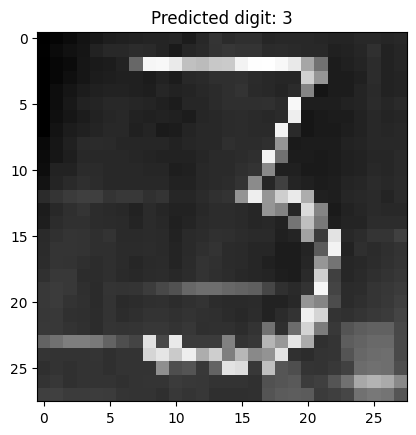

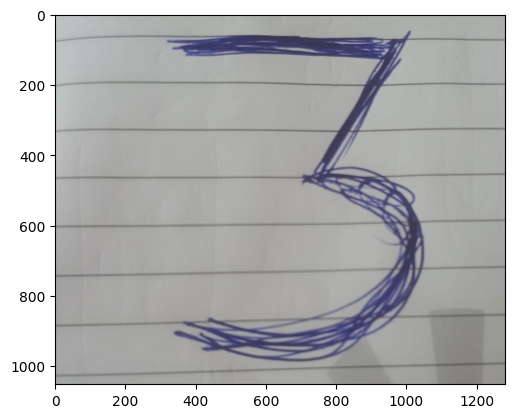

In [43]:
plt.imshow(digit_image.reshape(28, 28), cmap='gray')
plt.title(f'Predicted digit: {predicted_label}')
plt.show()

import matplotlib.image as mpimg
image = mpimg.imread("digit.jpg")
plt.imshow(image)
plt.show()